## Завдання

Створіть свій датасет на основі випадкових даних за допомогою **numpy.linspace** та проведіть на ньому лінійну регресію, використовуючи інструменти **tensorflow**.

## Розв'язок

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tfc

In [2]:
tfc.disable_eager_execution()

In [3]:
x = np.linspace(15, 100, 100)
y = np.linspace(15, 100, 100)

In [4]:
x += np.random.uniform(-15, 15, 100)
y += np.random.uniform(-15, 15, 100)

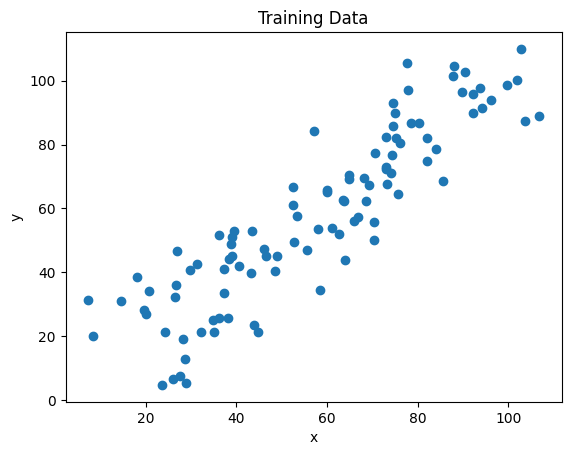

In [5]:
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Training Data")
plt.show()

In [6]:
X = tfc.placeholder("float")
Y = tfc.placeholder("float")
W = tf.Variable(np.random.randn(), name = "W")
b = tf.Variable(np.random.randn(), name = "b")

In [7]:
learning_rate = 0.01
training_epochs = 1000

In [8]:
y_pred = tf.add(tf.multiply(X, W), b)
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * len(x))

In [9]:
optimizer_gradient = tfc.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [10]:
init = tfc.global_variables_initializer()

In [11]:
with tfc.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        for (_x, _y) in zip(x, y):
            sess.run(optimizer_gradient, feed_dict = {X : _x, Y : _y})
        if (epoch + 1) % 50 == 0:
            c = sess.run(cost, feed_dict = {X : x, Y : y})
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b))
     
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y})
    weight = sess.run(W)
    bias = sess.run(b)

Epoch 50 : cost = 99.41372 W = 1.1308349 b = -0.7290846
Epoch 100 : cost = 100.183205 W = 1.1250908 b = -0.1973627
Epoch 150 : cost = 100.98299 W = 1.1195467 b = 0.31584063
Epoch 200 : cost = 101.808205 W = 1.1141956 b = 0.81116873
Epoch 250 : cost = 102.654236 W = 1.1090308 b = 1.2892449
Epoch 300 : cost = 103.517105 W = 1.104046 b = 1.7506772
Epoch 350 : cost = 104.39293 W = 1.0992347 b = 2.1960344
Epoch 400 : cost = 105.2784 W = 1.0945911 b = 2.6258795
Epoch 450 : cost = 106.17036 W = 1.0901091 b = 3.0407596
Epoch 500 : cost = 107.06609 W = 1.0857832 b = 3.4411857
Epoch 550 : cost = 107.963066 W = 1.0816082 b = 3.8276608
Epoch 600 : cost = 108.85897 W = 1.0775787 b = 4.2006593
Epoch 650 : cost = 109.751915 W = 1.073689 b = 4.5607157
Epoch 700 : cost = 110.63984 W = 1.069935 b = 4.908204
Epoch 750 : cost = 111.52138 W = 1.0663117 b = 5.2436004
Epoch 800 : cost = 112.39487 W = 1.062815 b = 5.5672846
Epoch 850 : cost = 113.25914 W = 1.0594398 b = 5.87971
Epoch 900 : cost = 114.113106 W

In [12]:
predictions = weight * x + bias
predictions

array([ 34.00208267,  31.56030647,  37.23695111,  15.60379106,
        40.5957584 ,  28.58898483,  27.75049919,  14.48078742,
        35.6675145 ,  36.83614932,  43.41046768,  27.30628486,
        32.30822759,  38.0136877 ,  22.02467957,  43.58156841,
        25.80300625,  52.79718445,  53.86661786,  44.85191316,
        34.87381666,  52.15690662,  36.37295588,  35.13352445,
        45.91052247,  34.47679656,  58.25503028,  45.94323948,
        39.64454829,  46.84985463,  65.22372009,  44.65703399,
        55.14852437,  47.09919472,  47.48623406,  68.18938764,
        47.70265129,  52.40959443,  61.8455617 ,  62.07040573,
        48.31718699,  67.74329495,  49.34969059,  47.79327041,
        57.62205143,  69.70146902,  62.9359283 ,  70.91093923,
        80.75286811,  80.61308495,  73.91691033,  76.91083277,
        55.56882127,  72.66607471,  61.91987103,  86.15623135,
        74.84982966,  78.84597157,  83.54171343,  84.74198107,
        73.75664868,  74.98093011,  73.5614704 ,  76.09

In [13]:
print(f"Training cost = {training_cost}\nWeight = {weight}\nbias = {bias}")

Training cost = 115.7861099243164
Weight = 1.0500030517578125
bias = 6.753234386444092


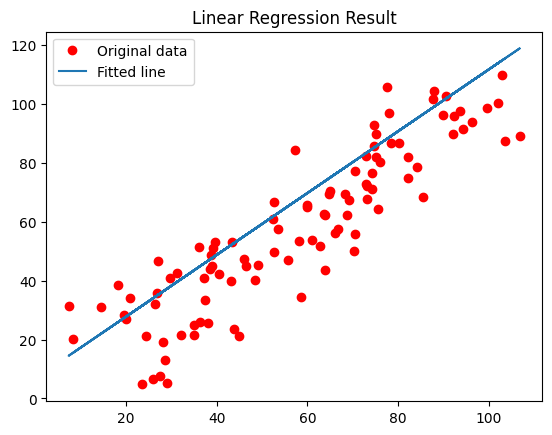

In [14]:
plt.plot(x, y, "ro", label ="Original data")
plt.plot(x, predictions, label ="Fitted line")
plt.title("Linear Regression Result")
plt.legend()
plt.show()